In [1]:
import os
import matplotlib.pyplot as plt

from utils import add_path, save_in

add_path()

from model import (
    SocietyConstantsEnergyPrices,
    GovernmentBuildChargingStation,
    GovernmentMixedStrategy,
    GovernmentProvidesSubsidies,
    CV,
    EV,
    PHEV,
)
from model.utils import (
    get_trajectories,
    common_params,
    plot_intervals,
    check_by,
    plot_check_by,
)
from common import MC, T, common_initial_settings
common_initial_settings()


In [2]:

N = common_params["kwargs"]["population"]
title = "Impact of different fuel prices on the market share of vehicles."

param = "fuel_price"
param_list = [0,4,6,8]
name = "by_fuel_price.png"


common_params["kwargs"]["government"] = GovernmentProvidesSubsidies()
common_params

{'T': 180,
 'kwargs': {'alpha': 0.01,
  'car_price_noise': <function model.utils.common_params.<lambda>()>,
  'city_size': (17, 17),
  'corporation_margin': 0.2,
  'corporation_technological_progress': 0.004,
  'energy_price': 500,
  'energy_factor': 0.8,
  'fuel_price': 6,
  'government': <model.Government.GovernmentProvidesSubsidies at 0x7fdb09076bd0>,
  'initial_public_chargers': 1,
  'initial_time': (2015, 1),
  'nerby_radius': 1,
  'population': 3000}}

In [3]:

values = check_by(
    SocietyConstantsEnergyPrices, common_params["kwargs"], param, param_list, T, MC, 4
)


100%|██████████| 4/4 [00:06<00:00,  1.65s/it]


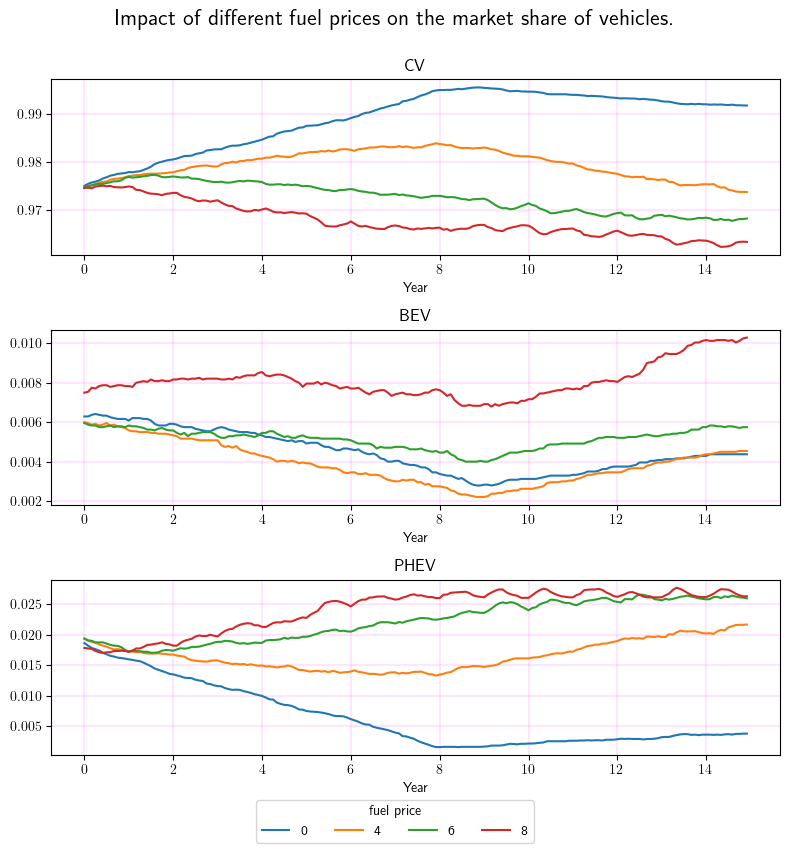

In [5]:
fig, axs = plt.subplots(nrows=3, figsize=(8, 8))
plot_check_by(values, axs)

fig.set_facecolor('white')
fig.suptitle(title, fontsize=16, y=1)

for ax in axs:
    ax.set_xlabel("Year")
    ax.grid(alpha=0.1)

axs[0].set_title(CV)
axs[1].set_title(EV)
axs[2].set_title(PHEV)
fig.tight_layout()
fig.legend(
    param_list,
    title=param.replace("_", " "),
    ncol=len(param),
    loc="lower center",
    bbox_to_anchor=(1/2, -0.05),
)

# save_in(name)
